In [1]:
!pip install plotly
!pip install matplotlib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
tesla = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Google_Stock_Price_Test.csv')
tesla.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [4]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    20 non-null     object 
 1   Open    20 non-null     float64
 2   High    20 non-null     float64
 3   Low     20 non-null     float64
 4   Close   20 non-null     float64
 5   Volume  20 non-null     object 
dtypes: float64(4), object(2)
memory usage: 1.1+ KB


In [5]:
tesla['Date'] = pd.to_datetime(tesla['Date'])

In [6]:
print(f'DataFrame contains stock prices between {tesla.Date.min()} {tesla.Date.max()}')
print(f'Total days = {(tesla.Date.max() - tesla.Date.min()).days} days')

DataFrame contains stock prices between 2017-01-03 00:00:00 2017-01-31 00:00:00
Total days = 28 days


In [7]:
tesla.describe()

,Date,Open,High,Low,Close
count,20,20.000000,20.000000,20.000000,20.000000
mean,2017-01-16 15:36:00,807.526000,811.926500,801.949500,807.904500
min,2017-01-03 00:00:00,778.810000,789.630000,775.800000,786.140000
25%,2017-01-09 18:00:00,802.965000,806.735000,797.427500,802.282500
50%,2017-01-17 12:00:00,806.995000,808.640000,801.530000,806.110000
75%,2017-01-24 06:00:00,809.560000,817.097500,804.477500,810.760000
max,2017-01-31 00:00:00,837.810000,841.950000,827.010000,835.670000
std,NaN,15.125428,14.381198,13.278607,13.210088


<Axes: >

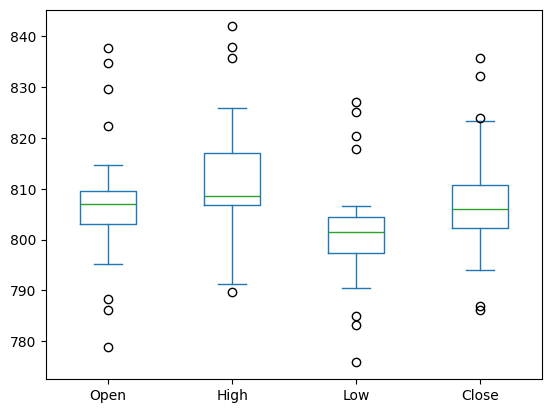

In [8]:
tesla[['Date','Open','High','Low','Close']].plot(kind='box')

In [9]:
import plotly.graph_objs as go
!pip install scikit_learn
from plotly.offline import iplot



In [22]:
#setting the layout for our plot
layout = go.Layout(
    title='Stock Prices of Tesla',
     xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New,monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New,monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
tesla_data = [{'x':tesla['Date'],'y':tesla['Close']}]
plot = go.Figure(data=tesla_data, layout=layout)



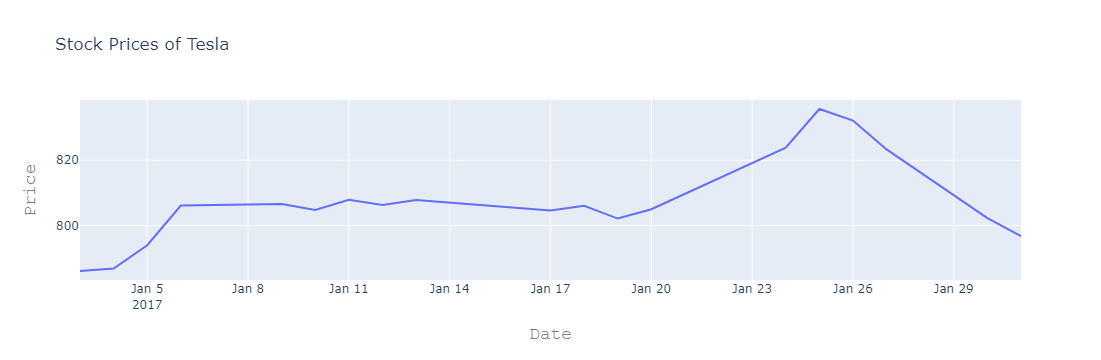

In [23]:
#plot(plot) #plotting offline
iplot(plot)

In [24]:
#building the regression model
from sklearn.model_selection import train_test_split

#for preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#for model evolution
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score



In [25]:
#split the data into train and test sets
X = np.array(tesla.index).reshape(-1,1)
Y = tesla['Close']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=101)

In [26]:
#feature scaling
scaler = StandardScaler().fit(X_train)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
#Creating a Linear Model
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [29]:
#plot actual and predicted values for train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode= 'lines',
    name = 'Predicted'
)
tesla_data = [trace0,trace1]
layout.xaxis.title.text='Day'
plot2 = go.Figure(data=tesla_data,layout=layout)

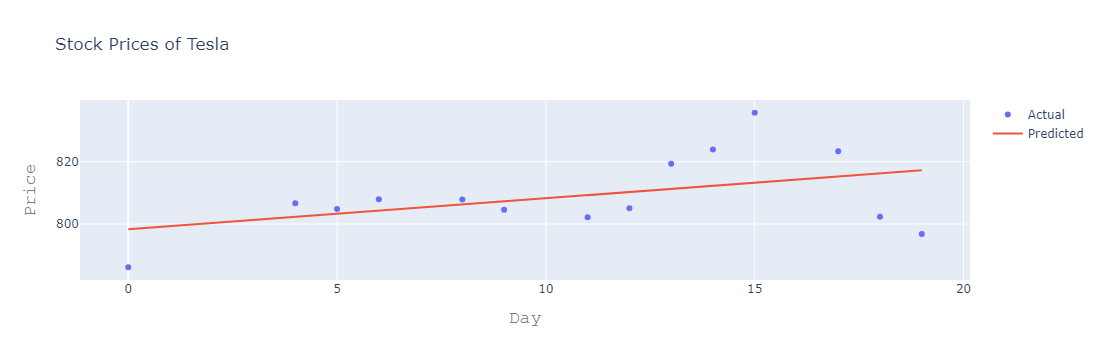

In [30]:
iplot(plot2)

In [19]:
#calculate scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train,lm.predict(X_train))}\t{r2_score(Y_test,lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test,lm.predict(X_test))}
'''
print(scores)



Metric           Train                Test        
r2_score  0.2022359937101338	0.5424484005360012
MSE       117.79559780145406	90.68338307415848

